## Importing all the libraries

In [1]:
import csv
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product

## open the file</br> 
We are using the csv and the xlsx but the xlsx is slower, that is why we keep them both.
We also changed scot to scotland in the excel

In [2]:
#ds = pd.read_csv('EuropeTop100Attractions.csv', sep=";", decimal=",")

# parsing these columns as datatime type
#cols = ['reviewWritten','reviewVisited']
#ds[cols] = ds[cols].apply(pd.to_datetime)
#infer_datetime_format=True

ds = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name='Reviews', decimal=",")
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

we have found that there is some misspeled data on excel
(add foto later)

In [4]:
ds['localID'] = np.where(ds['localID']=='genis','MAG005',ds['localID'])
ds['localID'] = np.where(ds['localID']=='u','MAG006',ds['localID'])

## trying to find the outliers with a plot

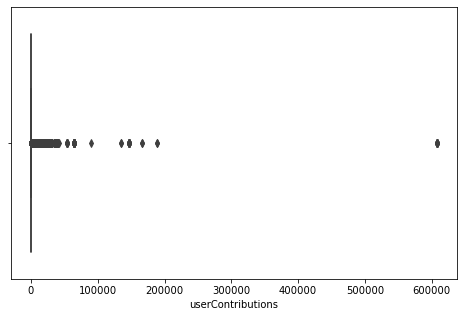

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.boxplot(data=ds, x='userContributions')

## removing the duplicated

In [10]:
## Checking duplicated values
ds.duplicated().sum()

0

In [10]:
dsNoDuplicated = ds[False == ds.duplicated()] #removing duplicated rows
dsNoDuplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

percentage of data whitout the duplicated one

In [11]:
len(dsNoDuplicated.index)/len(ds.index)

1.0

In [12]:
dsNoDuplicated_review = dsNoDuplicated[dsNoDuplicated.duplicated(subset=["reviewFullText"], keep = False)]
dsNoDuplicated_review.info()
#We found that this are misscoded valaue, repetitive review sometimes for different location from the same person and sometimes is different trip type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 260 to 91997
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            14061 non-null  object        
 1   extractionDate     14061 non-null  datetime64[ns]
 2   globalRating       14061 non-null  float64       
 3   positionOnRanking  14061 non-null  int64         
 4   sitesOnRanking     14061 non-null  int64         
 5   totalReviews       14061 non-null  int64         
 6   userName           14061 non-null  object        
 7   userLocation       11994 non-null  object        
 8   userContributions  14061 non-null  int64         
 9   tripType           9747 non-null   object        
 10  reviewWritten      14061 non-null  datetime64[ns]
 11  reviewVisited      13956 non-null  datetime64[ns]
 12  reviewRating       14061 non-null  int64         
 13  reviewLanguage     14061 non-null  object        
 14  revi

We looked at the Data from Excel and realized that there ae two duplicated review from the same user. </br> We can see that some of the vduplicated have different traveltype (Couple, Family) and some of them have different localID. So, we think it is an error and not a bot, so we just deleted it because it was a small percantage.


In [13]:
dsNoDuplicated = dsNoDuplicated[False == dsNoDuplicated.duplicated(subset=["reviewFullText"], keep = False)]
dsNoDuplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78059 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            78059 non-null  object        
 1   extractionDate     78059 non-null  datetime64[ns]
 2   globalRating       78059 non-null  float64       
 3   positionOnRanking  78059 non-null  int64         
 4   sitesOnRanking     78059 non-null  int64         
 5   totalReviews       78059 non-null  int64         
 6   userName           78039 non-null  object        
 7   userLocation       66658 non-null  object        
 8   userContributions  78059 non-null  int64         
 9   tripType           53305 non-null  object        
 10  reviewWritten      78059 non-null  datetime64[ns]
 11  reviewVisited      77454 non-null  datetime64[ns]
 12  reviewRating       78059 non-null  int64         
 13  reviewLanguage     78059 non-null  object        
 14  review

Looking at the column name MergedNameContribution has 200 more values than the UserName column which tell us that 200 users have written comments between 2 days of extraction the data (which we can see from the extraction column). And we will live it as it is.

In [14]:
#Easy way of finding if there is missmatch between userContribution and userName

dsMismatchUserAndContributions = ds.copy(deep=True)
dsMismatchUserAndContributions["MergedNameContribution"] = dsMismatchUserAndContributions["userName"] +  dsMismatchUserAndContributions["userContributions"].astype(str)
dsMismatchUserAndContributions.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


removing userName and review with missing value, 20 were deleted.

In [15]:
dsNoDuplicated.isna().sum()

localID                  0
extractionDate           0
globalRating             0
positionOnRanking        0
sitesOnRanking           0
totalReviews             0
userName                20
userLocation         11401
userContributions        0
tripType             24754
reviewWritten            0
reviewVisited          605
reviewRating             0
reviewLanguage           0
reviewFullText           0
dtype: int64

In [16]:
dsNoDuplicated.dropna(subset=['userName','reviewVisited'], inplace=True)
dsNoDuplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77454 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            77454 non-null  object        
 1   extractionDate     77454 non-null  datetime64[ns]
 2   globalRating       77454 non-null  float64       
 3   positionOnRanking  77454 non-null  int64         
 4   sitesOnRanking     77454 non-null  int64         
 5   totalReviews       77454 non-null  int64         
 6   userName           77454 non-null  object        
 7   userLocation       66146 non-null  object        
 8   userContributions  77454 non-null  int64         
 9   tripType           53305 non-null  object        
 10  reviewWritten      77454 non-null  datetime64[ns]
 11  reviewVisited      77454 non-null  datetime64[ns]
 12  reviewRating       77454 non-null  int64         
 13  reviewLanguage     77454 non-null  object        
 14  review

deleting the one with location as a number

In [17]:
dsLocationString = dsNoDuplicated.copy(deep=True)
dsLocationString["userLocation"] = dsLocationString["userLocation"].apply(str)

dsNoDuplicated['userLocation'] = np.where(dsNoDuplicated['userLocation']=='.','',dsNoDuplicated['userLocation'])
dsNoDuplicated['userLocation'] = np.where(dsLocationString['userLocation'].str.isnumeric(),'',dsNoDuplicated['userLocation'])

#dsNoDuplicated = dsNoDuplicated[False == dsLocationString["userLocation"].str.isnumeric()]
dsNoDuplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77454 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            77454 non-null  object        
 1   extractionDate     77454 non-null  datetime64[ns]
 2   globalRating       77454 non-null  float64       
 3   positionOnRanking  77454 non-null  int64         
 4   sitesOnRanking     77454 non-null  int64         
 5   totalReviews       77454 non-null  int64         
 6   userName           77454 non-null  object        
 7   userLocation       66146 non-null  object        
 8   userContributions  77454 non-null  int64         
 9   tripType           53305 non-null  object        
 10  reviewWritten      77454 non-null  datetime64[ns]
 11  reviewVisited      77454 non-null  datetime64[ns]
 12  reviewRating       77454 non-null  int64         
 13  reviewLanguage     77454 non-null  object        
 14  review

we need to use a density plot to decide which is an outllier

In [18]:
dsNoOutlier = dsNoDuplicated[dsNoDuplicated['userContributions'] < 2000]

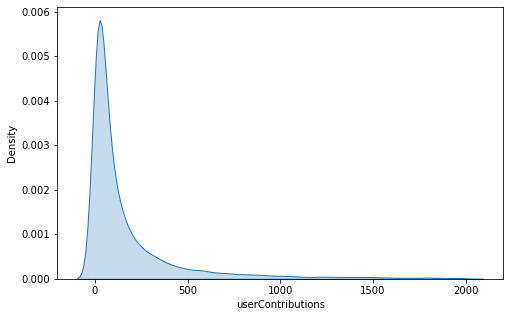

In [19]:
# DENSITY PLOT (Kernel Density Estimate)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.kdeplot(dsNoOutlier['userContributions'], shade=True, legend=False)

In [20]:
print ((dsNoDuplicated['userContributions']> 500).value_counts())

False    67852
True      9602
Name: userContributions, dtype: int64


In [21]:
len(dsNoOutlier.index)/len(dsNoDuplicated.index)

0.9707181036486172

In [22]:
dsNoOutlier.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,75186,100,MAG001,7428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,75186,NaN,NaN,NaN,2021-08-20 22:24:14.354123264,2021-08-20 08:24:40.077000,2021-08-20 11:56:59.129499904,2021-08-20 15:42:52.400499968,2021-08-21 12:36:03.094749952,2021-08-21 16:27:17.026000,NaN
globalRating,75186.0,NaN,NaN,NaN,4.48386,4.0,4.5,4.5,4.5,5.0,0.178746
positionOnRanking,75186.0,NaN,NaN,NaN,3.859402,1.0,1.0,2.0,6.0,55.0,4.806851
sitesOnRanking,75186.0,NaN,NaN,NaN,731.895978,5.0,154.0,487.0,1186.0,3837.0,778.816131
totalReviews,75186.0,NaN,NaN,NaN,41739.03377,5179.0,14152.0,25519.0,51324.0,163828.0,44399.976311
userName,75186,60026,packcal@packcal,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,63932,11943,"London, UK",3017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,75186.0,NaN,NaN,NaN,179.960697,0.0,19.0,63.0,191.0,1999.0,301.234752
tripType,51857,5,Couples,26150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Saving the cleaned data to csv </br> 
We are using the csv and the xlsx but the xlsx is slower, that is why we keep them both.

In [19]:
#csv = dsNoOutlier.to_csv(index=False, sep=';', quotechar='"', decimal=',')
#csv_file = open("europeTop100Cleaned2.csv", "w", encoding="utf-16")
#csv_file.write(csv)
#csv_file.close()

dsNoOutlier.to_excel('cleaned.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())

2022-11-23 20:02:30.544106


We need to add iso in order to print the clened iso file here instead of making it with python